In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

#Libraries for Data Visualization 
import matplotlib.pyplot as plt 
%matplotlib inline 
 
# scaling  
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
 
# linear regression 
from sklearn import linear_model 

In [3]:
Pov_data = pd.read_csv("Poverty_LifeExp.csv") 
# quick view of columns and values 
Pov_data.head() 
# how many columns and rows in dataframe 
Pov_data.shape 
Pov_data.isnull().sum() 
# are there duplicate values? 
format(len(Pov_data[Pov_data.duplicated()])) 
# standard statistical measures 
Pov_data.describe(percentiles = [.25, .5, .75, .90 ,.95, .99]) 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


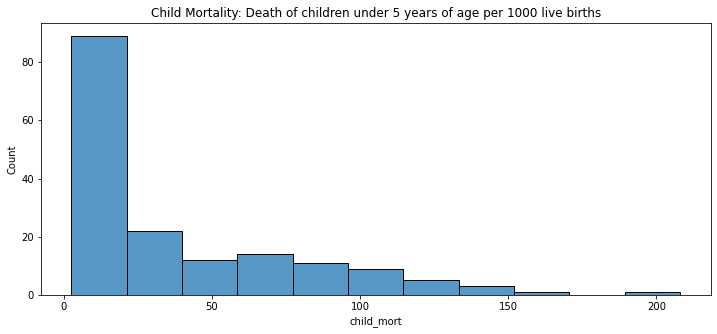

In [4]:
plt.figure(figsize=(12,5)) 
plt.title("Child Mortality: Death of children under 5 years of age per 1000 live births") 
ax = sns.histplot(Pov_data["child_mort"]) 

<AxesSubplot:>

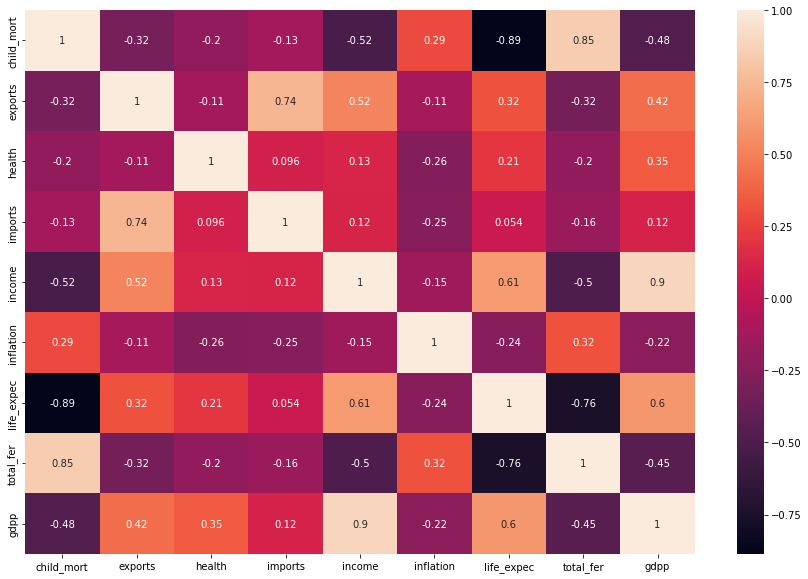

In [5]:
# pearson 
plt.figure(figsize=(15,10)) 
sns.heatmap(Pov_data.corr(method='pearson', min_periods=1),annot=True)

In [5]:
Pov_data.corr() 
 


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


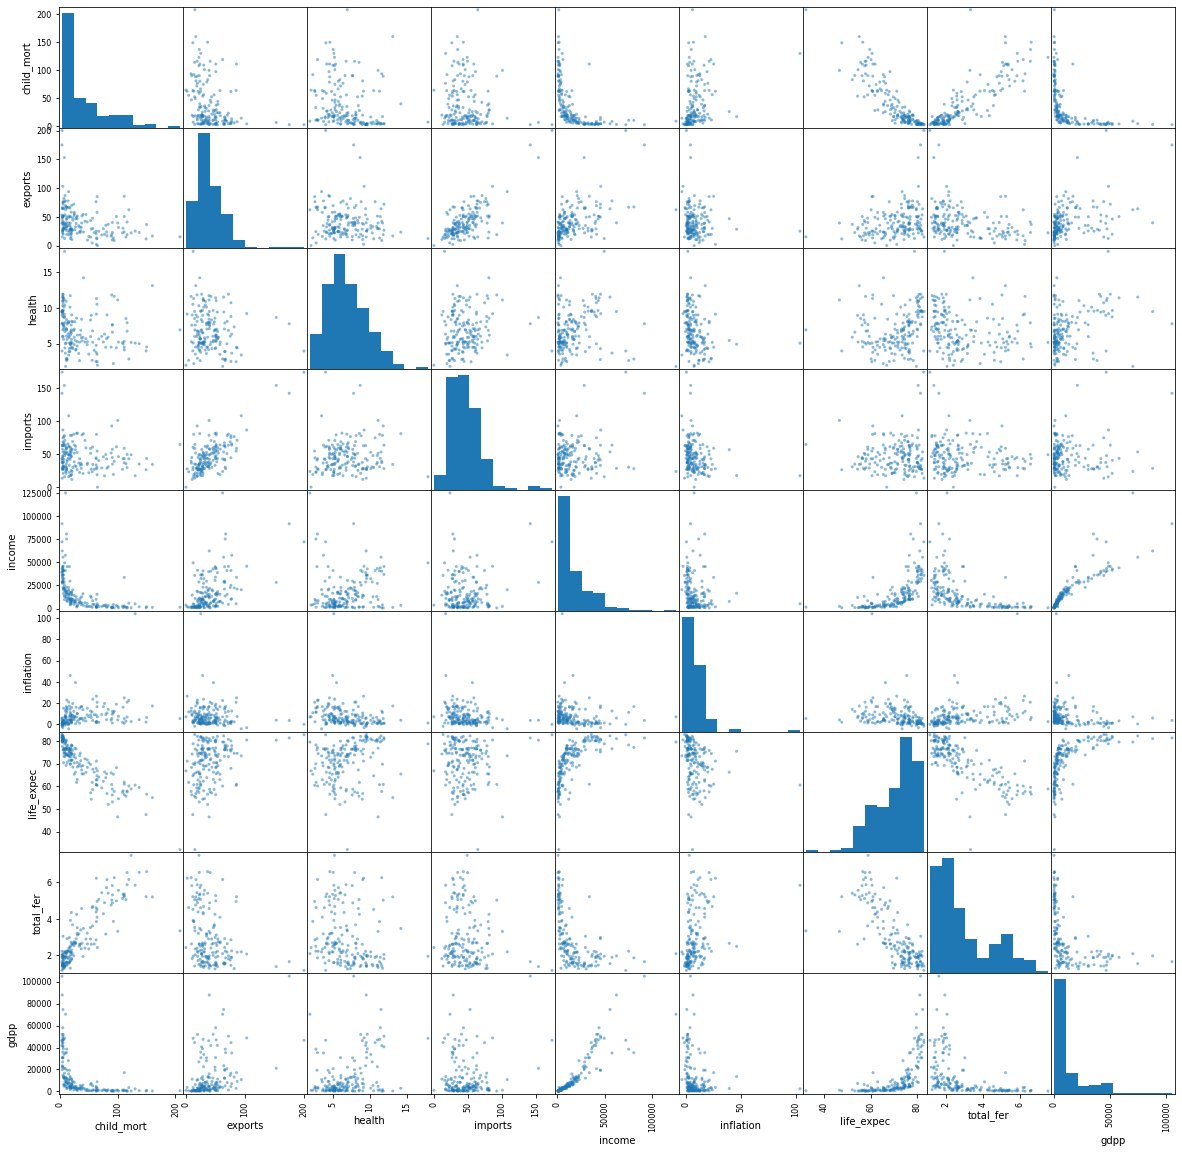

In [6]:
pd.plotting.scatter_matrix(Pov_data,figsize=[20,20]) 
plt.show() 

In [7]:
# ---------------------- To Do 1 --------------------- #
########################################################
#Answer: 
# For the standard statistical measures 
# Pov_data.describe(percentiles = [.25, .5, .75, .90 ,.95, .99]) 
# We can see that the graph showing us the information of child_mort, exports, 
# health, imports, income, inflation, life_expec, total_fer, gdpp with duplicate values of
# count = 167.000000. 
# Also, with difference graph:
# Child Mortality: Death of children under 5 years of age per 1000 live births" is showing us
# the number of children under 5 years of age
# With the Pov_data.corr() and the plotting of data matrix, we can say that if the number = 1
# the graph will appear as graph like health = health = 1, income = income = 1,...With 
# difference data, the graph will not show up, but instead the total plotting showing us 
# somes "Positive association" means greater acceleration tended to more income, more health,...
# Negative association means less income, less imports, less health.

In [8]:
Pov_data_Drop  =  Pov_data.drop(['country'],  axis  =1)  #  eliminate  the  
# column. Save the new dataset as Pov_data_Drop so you have a backup of 
# original dataset just in case! 
Pov_data_Drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
# Columns argument ==> we'll use this later to create a new dataframe  
 # with the rescaled data  
columns = Pov_data_Drop.columns 
 
scaler = MinMaxScaler() # for the rescaling  
 
#'fit' function is to find the x_min and the x_max 
#'transform' function applies formula to all elements of data 
 
normalised_dataset = scaler.fit_transform(Pov_data_Drop) 
 
normalised_dataset 
 


array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [10]:
My_normalised_df = pd.DataFrame(data = normalised_dataset, columns = columns) 
My_normalised_df 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [11]:
my_mpi_ds = pd.read_csv("MPI_Dataset.csv")

In [12]:
my_mpi_ds

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9
...,...,...,...,...,...,...,...,...
97,CAF,Central African Republic,0.289,58.2,49.7,0.519,89.79,57.8
98,LBR,Liberia,0.290,60.5,48.0,0.481,84.86,56.6
99,SOM,Somalia,0.293,55.9,52.4,0.651,96.92,67.2
100,TCD,Chad,0.351,64.8,54.1,0.609,93.41,65.2


In [13]:
my_mpi_ds = my_mpi_ds.drop(['ISO','Headcount Ratio Urban','Intensity of Deprivation Urban',
                                   'Headcount Ratio Rural','Intensity of Deprivation Rural'], axis=1)

#Rename the column heading as below 
my_mpi_ds.rename( 
columns = {'Country':'country', 
'MPI Urban':'mpi_urban', 
'MPI Rural':'mpi_rural' 
}, 
inplace = True) 
 
# show the headings 
my_mpi_ds.head(3) 

,country,mpi_urban,mpi_rural
0,Kazakhstan,0.0,0.000
1,Serbia,0.0,0.002
2,Kyrgyzstan,0.0,0.003


In [14]:
combined = pd.merge( 
    Pov_data, 
    my_mpi_ds, 
    on='country', 
    how='inner' 
) 
 
combined.head() 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,mpi_urban,mpi_rural
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.132,0.347
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.003,0.007
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.003,0.011
3,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0.001,0.001
4,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.80,69.1,1.92,5840,0.009,0.035


In [15]:
###########################################################
# -------------------- To Do 2 --------------------------#

# Answer: The table "country" contains data on child_mort in Afghanistan,
# Albania, Algeria, Armenia, and Azerbaijan. The columns includes: country,
# child_mort, exports, health, imports, income, inflation, life_expec,
# total_fer, gdpp. From the table we can see that data of child_mort in 
# Afghanistan is highest number = 90.2, in Albania is having lowest number
# of child_mort = 16.6. Number of exports in Azerbaijan is highest = 54.3,
# and in Afghanistan is lowest = 10. Number of health in Algeria is lowest
# number = 4.17, and in Afghanistan = 7.58. Number imports with lowest is
# 20.7 belong to Azerbaijan, and highest = 45.3 belong to Armenia. Income
#number in Azerbaijan is highest = 16000 because of the exports number is
# high as well, so number export is low in Afghanistan means number of 
# income is low as well. Number of inflation in Albania is lowest = 4.49,
# and number in Algeria is highest = 16.10. About the nunber of life_expec
# we can see that in Albania = 76.3, and Algeria = 76.5 is almost euqal,
# but still Algeria is highest number of life_expec, and Afghanistan is
# have lowest number = 56.2. Number total_fer in Afghanistan = 5.82 is
# a lot higher compare with other comtries, and in Albania is have lowest
# number of total_fer = 1.65. Number of gdpp in Azerbaijan is highest number
# = 5840, compare with 553 in Afghanistan is a lot difference.
# Number inports is 44.3, 48.6, 45.3 is multicollinearity because 
# these data number almost same.
# Also we can say the life_expec in Albania = 76.3, Algeria = 76.5, and 
# Armenia = 73.3 is almost same and there are multicollinearity with 
# features of life_expec.
# We can see that the total_fer in these countries Albania, Armenia, Azerbaijan
# there are multicollinearity.

In [16]:
reg = linear_model.LinearRegression()#linear regression class object  
 
import statsmodels.api as sm  
from  statsmodels.formula.api  import  ols  #libraries  for  plotting of residual plots 

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     163.5
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           9.91e-21
Time:                        12:18:40   Log-Likelihood:                 127.06
No. Observations:                  79   AIC:                            -250.1
Df Residuals:                      77   BIC:                            -245.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0230      0.010     -2.388      0.0

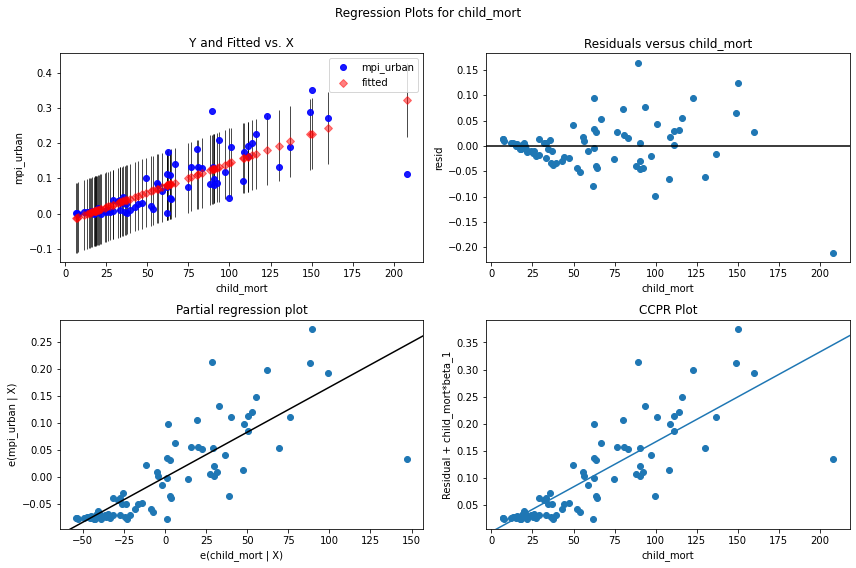

In [17]:
#fit simple linear regression model "chil_mort"
model = ols('mpi_urban ~ child_mort', data=combined).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'child_mort', fig=fig)

In [28]:
#------------------------ To Do 3 ------------------- #
#######################################################
# Answer:

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     14.47
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           0.000284
Time:                        12:18:40   Log-Likelihood:                 88.871
No. Observations:                  79   AIC:                            -173.7
Df Residuals:                      77   BIC:                            -169.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1441      0.020      7.374      0.0

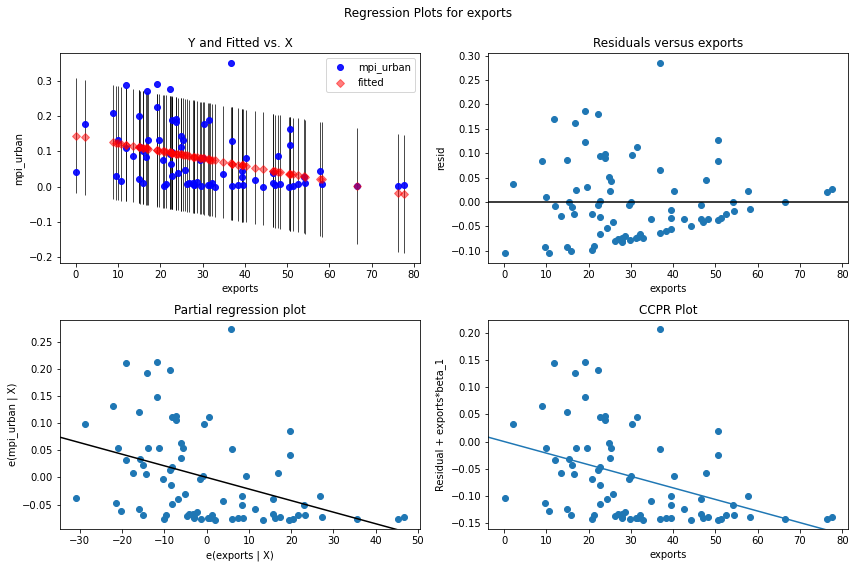

In [18]:
#fit simple linear regression model "exports"
model = ols('mpi_urban ~ exports', data=combined).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'exports', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.293
Date:                Fri, 25 Mar 2022   Prob (F-statistic):              0.259
Time:                        12:18:41   Log-Likelihood:                 82.729
No. Observations:                  79   AIC:                            -161.5
Df Residuals:                      77   BIC:                            -156.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0484      0.028      1.738      0.0

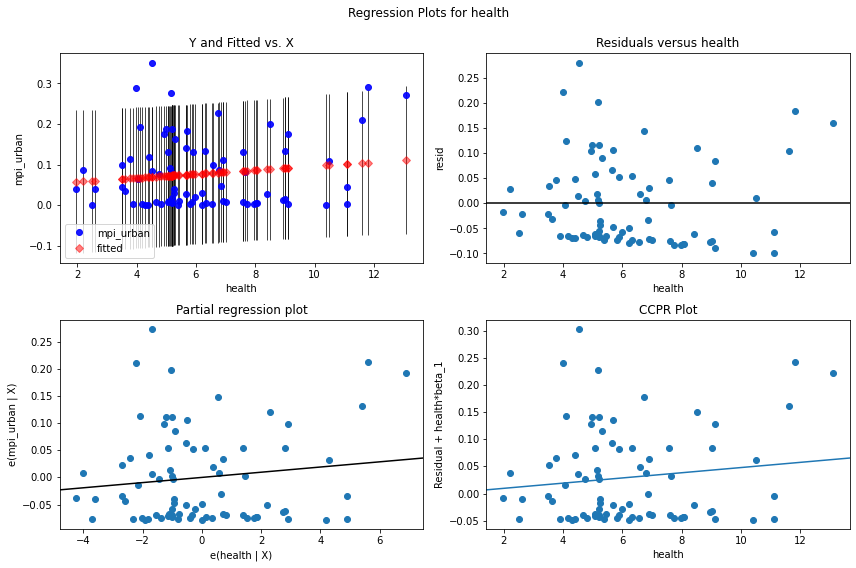

In [19]:
#fit simple linear regression model "health"
model = ols('mpi_urban ~ health', data=combined).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'health', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1548
Date:                Fri, 25 Mar 2022   Prob (F-statistic):              0.695
Time:                        12:18:42   Log-Likelihood:                 82.150
No. Observations:                  79   AIC:                            -160.3
Df Residuals:                      77   BIC:                            -155.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0871      0.025      3.479      0.0

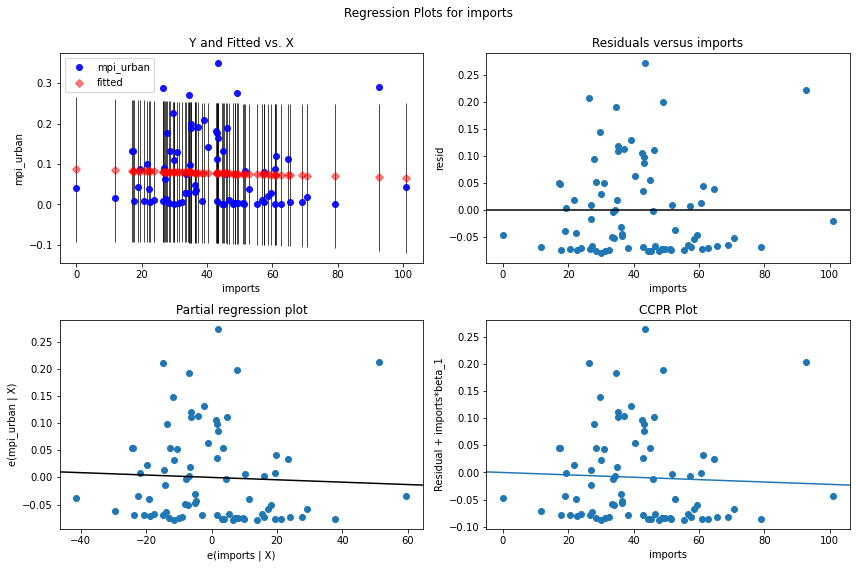

In [20]:
#fit simple linear regression model "imports"
model = ols('mpi_urban ~ imports', data=combined).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'imports', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     69.50
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           2.28e-12
Time:                        12:18:44   Log-Likelihood:                 107.48
No. Observations:                  79   AIC:                            -211.0
Df Residuals:                      77   BIC:                            -206.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1534      0.011     13.366      0.0

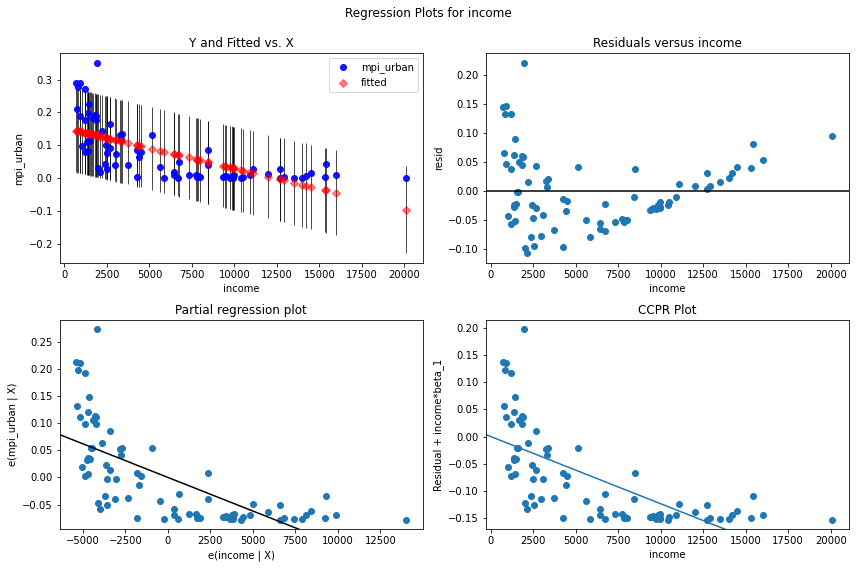

In [21]:
#fit simple linear regression model of "income"
model = ols('mpi_urban ~ income', data=combined).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'income', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2483
Date:                Fri, 25 Mar 2022   Prob (F-statistic):              0.620
Time:                        12:18:45   Log-Likelihood:                 82.198
No. Observations:                  79   AIC:                            -160.4
Df Residuals:                      77   BIC:                            -155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0744      0.012      6.080      0.0

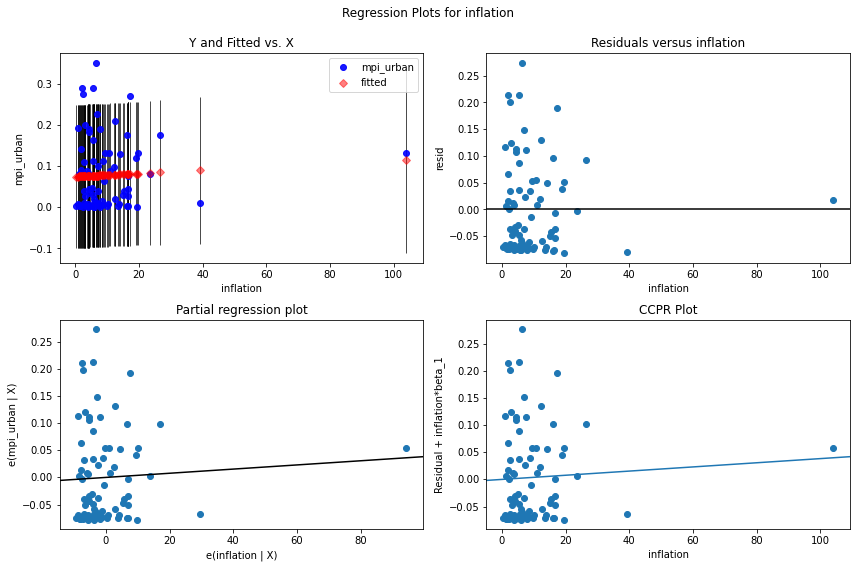

In [22]:
#fit simple linear regression model of "inflation"
model = ols('mpi_urban ~ inflation', data=combined).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'inflation', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     54.76
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.44e-10
Time:                        12:18:46   Log-Likelihood:                 103.29
No. Observations:                  79   AIC:                            -202.6
Df Residuals:                      77   BIC:                            -197.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4971      0.057      8.703      0.0

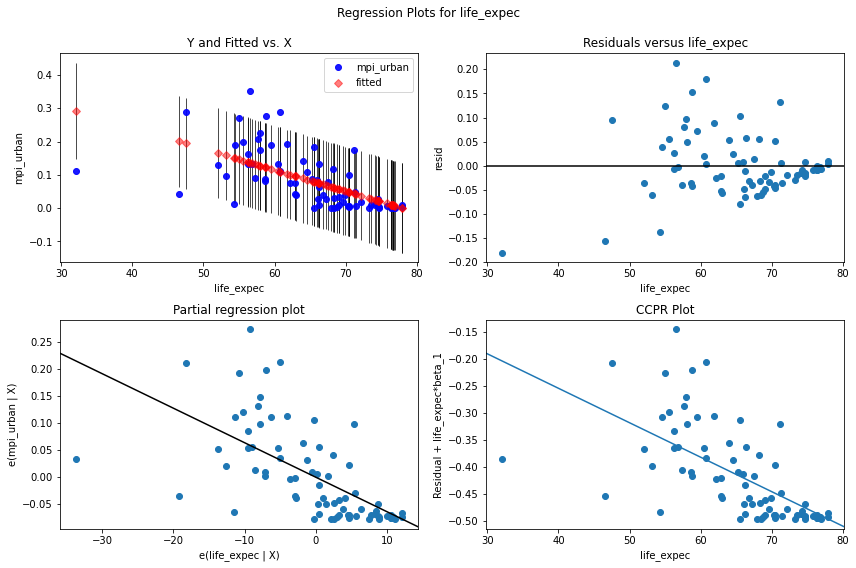

In [23]:
#fit simple linear regression model of "life_expec"
model = ols('mpi_urban ~ life_expec', data=combined).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'life_expec', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     206.9
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           1.60e-23
Time:                        12:18:48   Log-Likelihood:                 133.62
No. Observations:                  79   AIC:                            -263.2
Df Residuals:                      77   BIC:                            -258.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0949      0.013     -7.270      0.0

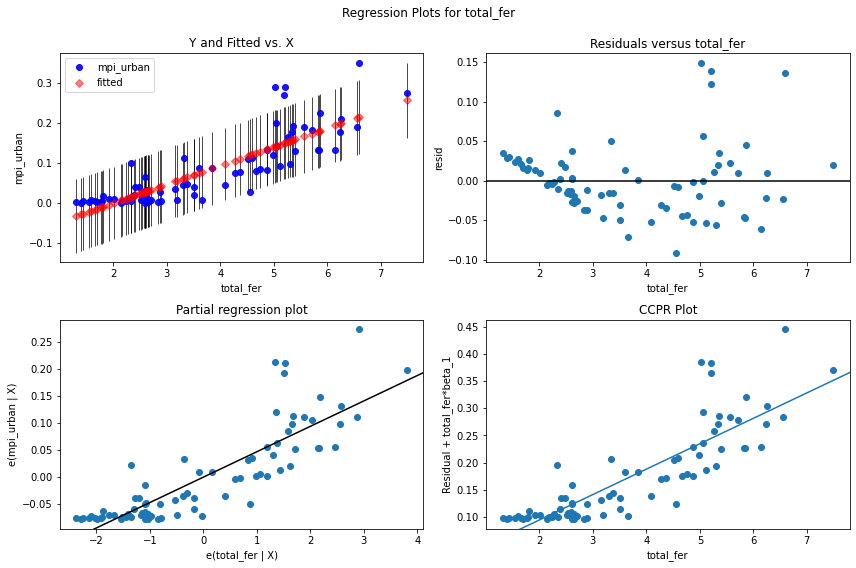

In [24]:
#fit simple linear regression model of "total_fer"
model = ols('mpi_urban ~ total_fer', data=combined).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'total_fer', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     35.62
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           6.90e-08
Time:                        12:18:49   Log-Likelihood:                 97.089
No. Observations:                  79   AIC:                            -190.2
Df Residuals:                      77   BIC:                            -185.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1275      0.012     11.024      0.0

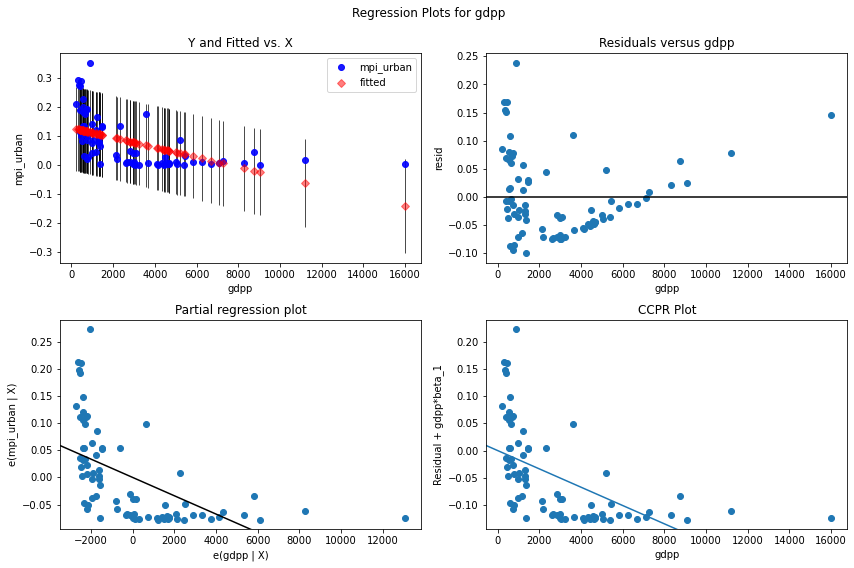

In [25]:
#fit simple linear regression model of "gdpp"
model = ols('mpi_urban ~ gdpp', data=combined).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'gdpp', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.272e+32
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:18:50   Log-Likelihood:                 2867.8
No. Observations:                  79   AIC:                            -5732.
Df Residuals:                      77   BIC:                            -5727.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.334e-17    6.4e-18     -8.329      0.0

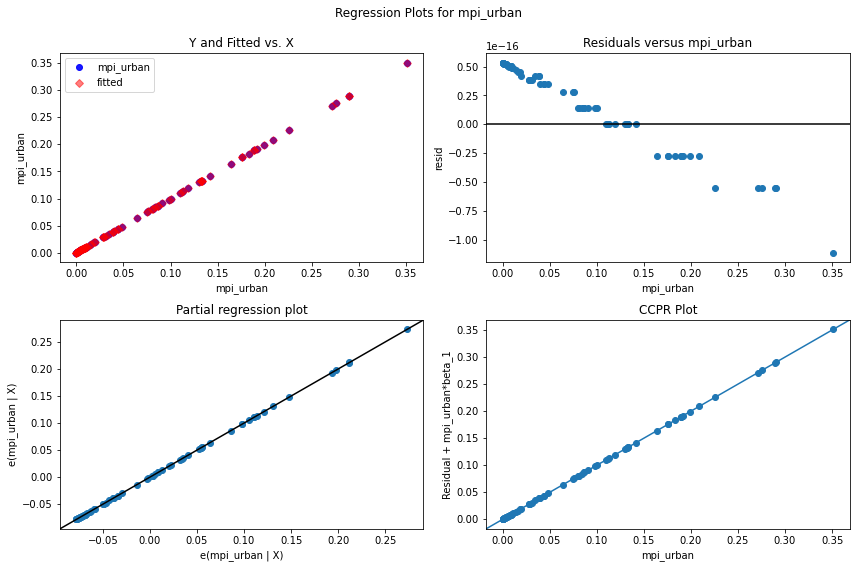

In [26]:
#fit simple linear regression model of "mpi_urban"
model = ols('mpi_urban ~ mpi_urban', data=combined).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'mpi_urban', fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     587.5
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           8.86e-38
Time:                        12:18:51   Log-Likelihood:                 167.20
No. Observations:                  79   AIC:                            -330.4
Df Residuals:                      77   BIC:                            -325.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0119      0.005     -2.392      0.0

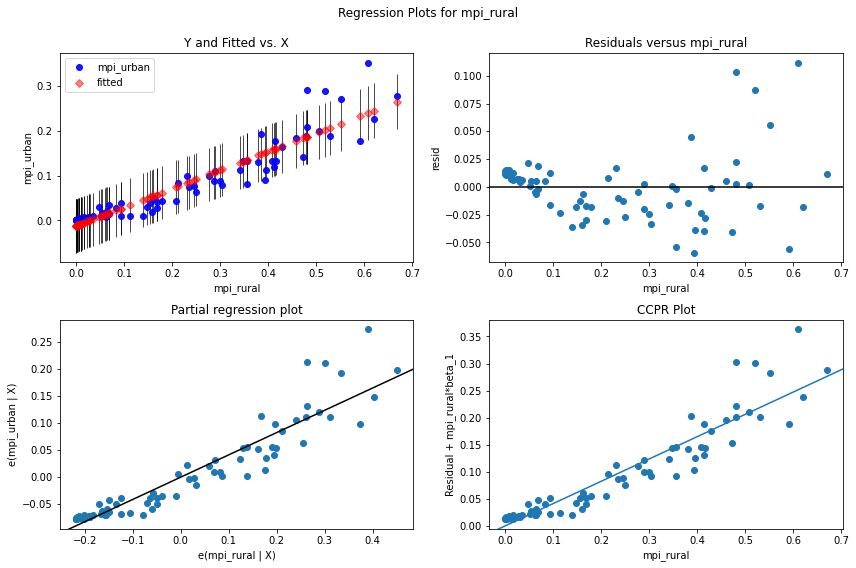

In [27]:
#fit simple linear regression model of "mpi_rural"
model = ols('mpi_urban ~ mpi_rural', data=combined).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'mpi_rural', fig=fig)